###以MNIST手寫數字資料集作為訓練，練習functional API，模型為單一輸入、多重輸出

1確認tensorflow版本並讀入相關套件

In [0]:
%tensorflow_version 2.x

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.layers import concatenate, add
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
#for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
#for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
#data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

2讀入MNIST手寫數字資料集並整理

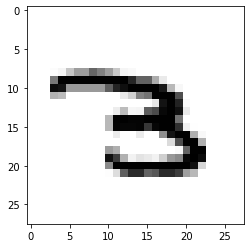

In [11]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
n = 250
plt.imshow(x_train[n],cmap="Greys")

In [0]:
#reshape data and do one-hot encoding
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

3建立模型與訓練

下圖為模型的結構，在第二層後有分歧，其後二者接在一起並做最後的運算與輸出

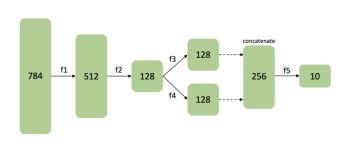

In [13]:
image = mpimg.imread('fAPI.png')
plt.imshow(image) 
plt.axis('off') 
plt.show()

In [0]:
f1 = Dense(512, activation='sigmoid')
f2 = Dense(128, activation='sigmoid')
f3 = Dense(128, activation='sigmoid')
f4 = Dense(128, activation='relu')
f5 = Dense(10, activation='softmax')

In [15]:
#第一個變數必定以 Input 函數來定義
x = Input(shape=(784,))
print(x)

Tensor("input_1:0", shape=(None, 784), dtype=float32)


In [0]:
h1 = f1(x)
h2 = f2(h1)
h3 = f3(h2)
h4 = f4(h2)
z = concatenate([h3, h4])
y = f5(z)

In [18]:
model = Model(x, y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 512)          401920      input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 128)          65664       dense_5[1][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 128)          16512       dense_6[1][0]                    
______________________________________________________________________________________________

In [0]:
model.compile(loss='mse', optimizer=Adam(), metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, batch_size=256, epochs=10)

Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0323 - accuracy: 0.7636
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0113 - accuracy: 0.9259
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0090 - accuracy: 0.9418
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0073 - accuracy: 0.9528
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0063 - accuracy: 0.9600
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0055 - accuracy: 0.9650
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0047 - accuracy: 0.9707
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0041 - accuracy: 0.9751
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0037 - accuracy: 0.9771
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 0.9792